In [ ]:
#LinkedList

class Block:
  hash = None
  data = None
  prev_hash = None

A = Block()
A.hash = 1
A.prev_hash = None
A.data = "Transaksi Rp. 50.000 dari A ke B"

B = Block()
B.hash = 2
B.prev_hash = A.hash
B.data = "Transaksi Rp. 10.000 dari B ke C"

C = Block()
C.hash = 3
C.prev_hash = B.hash
C.data = "Transaksi Rp. 5.000 dari C ke A"

In [ ]:
A.__dict__

{'data': 'Transaksi Rp. 50.000 dari A ke B', 'hash': 1, 'prev_hash': None}

In [ ]:
!pip install cryptography

     |████████████████████████████████| 4.0 MB 7.6 MB/s 


In [ ]:
!openssl genrsa -out nelsonkey.pem 1024

Generating RSA private key, 1024 bit long modulus (2 primes)
.............+++++
................................................................+++++
e is 65537 (0x010001)


In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

from google.colab import drive
drive.mount('/content/drive')

private_key_file = "/content/drive/My Drive/blockchain/octavkey.pem"
public_key_file = "/content/drive/My Drive/blockchain/octavkey.pub"
pesan = b"Octav bermain bola"

with open(private_key_file, "rb") as key_file:
  private_key = serialization.load_pem_private_key(
      key_file.read(),
      password=None,
      backend=default_backend()
  )

signature = private_key.sign(pesan,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    hashes.SHA256()
)

with open(public_key_file, "rb") as key_file:
  public_key = serialization.load_pem_public_key(
      key_file.read(),
      backend=default_backend()
  )

public_key.verify(
    signature,
    pesan,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    hashes.SHA256()
)

print(signature)


Mounted at /content/drive
b'^\xf1\xa8{\x12\xbc\x01\xfa\xa8\xbd\xcf4\xd4.{\x0c\xeah1\xf6\x9b\xe8v\x15\x1c\xf9\x019\x0f:"\'\x963\x9dpN@\xddm\x8aj\xed5F):\xcf\x0bv\n\xc1\xca\x96\x17\xd3c\xe1\nu\xb3\xb0\xb8\xbf\xc5\x06Ni\xb8f\xff\xe6V\xe7to\x10K\xceN.\xf4y\x11\xe1\xf74\x95\xe9N\xfe\xb3\x0e1\xa8\'n\xedg\xcec\xd7\xe9]\x91\xf8\x90\x9f\xb6Y\xb8\xc2l*\x0b\xd2\x0c\xb9\x8eh\xfc\xd3\xef\n\xec\x85\xe3\xf0'


In [ ]:
import hashlib
import json

class Block:
  hash = None
  data = None
  harga = None
  nama_penjual = None
  prev_hash = None

A = Block()
A.prev_hash = None
A. hash = hashlib.sha256(json.dumps(A.__dict__)
  .encode('utf-8')).hexdigest()
A.data = "Transaksi Rp. 50.000 dari A ke B"
A.harga = 10000
A.nama_penjual = "octav"

B = Block()
B.prev_hash = A.hash
B. hash = hashlib.sha256(json.dumps(B.__dict__)
  .encode('utf-8')).hexdigest()
B.data = "Transaksi Rp. 10.000 dari B ke C"
B.harga = 5000
B.nama_penjual = "bisa.ai"

C = Block()
C.prev_hash = B.hash
C. hash = hashlib.sha256(json.dumps(C.__dict__)
  .encode('utf-8')).hexdigest()
C.data = "Transaksi Rp. 5.000 dari C ke A"
C.harga = 3000
C.nama_penjual = "pamela"

In [ ]:
print(C.__dict__)

{'prev_hash': '78832bb3162b644135d765dc9359ee572e54deb4c5375d6fceba8a58c556e2e1', 'hash': '4f1fb77d8342e92a90851433ab1d0996011909947183234410a03cda6341becc', 'data': 'Transaksi Rp. 5.000 dari C ke A', 'harga': 3000, 'nama_penjual': 'pamela'}


In [ ]:
print(B.__dict__)
block_serialized = json.dumps(B.__dict__).encode('utf-8')
print(block_serialized)

{'prev_hash': '7df23f1728dfaf87652dc86eab24434d0ab0c83955413bbe018083e1f75414b8', 'data': 'Transaksi Rp. 10.000 dari B ke C'}
b'{"prev_hash": "7df23f1728dfaf87652dc86eab24434d0ab0c83955413bbe018083e1f75414b8", "data": "Transaksi Rp. 10.000 dari B ke C"}'


In [ ]:
print(C.__dict__)
block_serialized = json.dumps(C.__dict__).encode('utf-8')
print(block_serialized)

{'prev_hash': '78832bb3162b644135d765dc9359ee572e54deb4c5375d6fceba8a58c556e2e1', 'hash': '4f1fb77d8342e92a90851433ab1d0996011909947183234410a03cda6341becc', 'data': 'Transaksi Rp. 5.000 dari C ke A'}
b'{"prev_hash": "78832bb3162b644135d765dc9359ee572e54deb4c5375d6fceba8a58c556e2e1", "hash": "4f1fb77d8342e92a90851433ab1d0996011909947183234410a03cda6341becc", "data": "Transaksi Rp. 5.000 dari C ke A"}'


In [ ]:
D = Block()
D.prev_hash = C.hash
D.hash = hashlib.sha256(json.dumps(D.__dict__)
  .encode('utf-8')).hexdigest()
D.data = "Transaksi Rp. 1.000 dari D ke c"
print(D.__dict__)

{'prev_hash': '4f1fb77d8342e92a90851433ab1d0996011909947183234410a03cda6341becc', 'hash': 'e5a4b0381d7a9b876a159617eaaeba5782942cff6174771f5d57ca3fe5d2cc67', 'data': 'Transaksi Rp. 1.000 dari D ke c'}


In [ ]:
import json
block_serialized = json.dumps(D.__dict__).encode('utf-8')
print(block_serialized)

b'{"prev_hash": "4f1fb77d8342e92a90851433ab1d0996011909947183234410a03cda6341becc", "hash": "e5a4b0381d7a9b876a159617eaaeba5782942cff6174771f5d57ca3fe5d2cc67", "data": "Transaksi Rp. 1.000 dari D ke c"}'


In [ ]:
import hashlib
payload = b'{"prev_hash": "e5a4b0381d7a9b876a159617eaaeba5782942cff6174771f5d57ca3fe5d2cc67", "data": "Transaksi Rp. 500 dari D ke A"}'
for i in range(10000000):
  nonce = str(i).encode('utf-8')
  result = hashlib.sha256(payload + nonce).hexdigest()
  if result[0:5] == '00000':
    print(i)
    print(result)
    break

1455270
0000021ca8a7abb4c84b19d337320a8413c2d871a1e53a7fa3305a90ac75f531


In [ ]:
import json
import requests
  
# defining key/request url
key = "https://api.binance.com/api/v3/ticker/price?symbol=ETHUSDT"
  
# requesting data from url
data = requests.get(key)  
data = data.json()
print(f"{data['symbol']} price is {data['price']}")

ETHUSDT price is 2833.02000000


In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

df = yf.download("ETH-USD", start="2020-01-01", end="2022-04-30")
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-21,3077.829346,3173.451416,2962.410400,2987.480713,2987.480713,20783591093
2022-04-22,2986.938721,3024.854492,2942.358643,2964.835693,2964.835693,16782795477
2022-04-23,2964.802246,2975.322754,2926.740234,2938.114014,2938.114014,9116955609
2022-04-24,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
2022-04-25,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614
2022-04-26,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
2022-04-27,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041
2022-04-28,2888.849854,2973.135010,2861.821533,2936.940918,2936.940918,18443524633
2022-04-29,2936.776611,2943.445801,2782.435303,2815.601807,2815.601807,18771041399


In [ ]:
data = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAIQAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAIQAAwICCAgICAcHCAgHBwcICAgHBwcICAcHBwcHCAgHBwcHBwcHBwcHBwcHBwcHCgcHBwgJCQkHBwsNCggNBwgJCAEDBAQGBQYIBgYICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgI/8AAEQgDhAOEAwEiAAIRAQMRAf/EAB0AAQEBAAIDAQEAAAAAAAAAAAABAgMIBgcJBQT/xABKEAEBAAIBAgIHAwYMAwcDBQAAAQIRAwQSBQgGByExQVFhE3GxIjV0gZHwFCMlMkJScnOhssHRMzThFSRTYoKDkkNEwglUZMPx/8QAHAEBAAIDAQEBAAAAAAAAAAAAAAECBQYHAwQI/8QAQREBAAEDAgQCBggBCwQDAAAAAAECAxEEBQYSITFBURM0YXFygRQiMjWRobHB0RUjJDNCQ1Jic4LwU5KywhYl8f/aAAwDAQACEQMRAD8A8MAfrVwxx33tM2+1oAAEzZazZAKFSMALAlq1nQMYVtJFASKgM0MgBKqUGYEAEy9ylBkSKAADFCgDObSUGRi+9uAFCgxFSKAlVKDIACUpIDjxrRIAM5tM5gkVIoDOTTOQIAgSmapVoGQgSFZarJAJVFhMWNts0JEi7SCsKmSpkLMwICo4+SuROSAzFABitsUAABnJpKDIzGgEyUoMjOLQJWJW2coAABSgDEAAYyrZoGNqZxICgEDGWKYtZIsAColjDdYiwoCoWOOxyJcVhAuID2UQWPnWYyguSAAAlZjVZgBQqRgBYAAYVMoQFABnJFyQAAHFkuNM4YwFKFBiqlUAAGKFAE0pIDjsUoAUKDEVIoCVUBkM2cQaABgLABjNtMoDMVitQFSqzYDHIsXPEiASqlWgZgQRIMZt1m4pgZxqsyNLIkZzjbGYgSqlEyrOTSWCGZRPioBQoMKigMZtUyxBjFUkUAAGNBYAFEBjFpLioIWKlBmBAAAGcmca3YzIAADOaRq4s5QFEigliZRpLAZFuKQBNKAxBe1lYUBUTtUAeyAHismTMarMBQASsxqswAEoJlGMa3YzjFxQFRnJIuSRYUBUZyRckWBKqaBnKEXKJAChQYqpVAABii5Rxyg2ADOSLlEAKFBiKzksBUqgMWJI1YzAUAGai1ANooDFxUyAEUBnJFyiRAFCrQOPNYcuKSIkUCpgYFRZEqxk2zoRDONKnatFpUoUVcdxGrEEhSJRDKpcVAABxrooJhFRRDOSL2oAADOaRrKMA0JFBntSNVmAAAMNs9oIFAGc2kuIMxSxICgAlZjVZ0sAkVUGbi0AwLcWasKAqPZADxWSsxqswFABKzGnHlQaABGW2FwAUGcki5YsbXGwEYGcoxlW6xlikaABLGY2xAALQYzSVcokgNIoDFZmLkZ0AADOSLkgCWqaBx5xYucAAASsxqsgAAzYzjWmcYCgAzkkayZgKACVmNVx5UGggCZMxusRIAJwMVMa1cWcYlEtJFSCIZqValFpVFQVKzWrGbBYhYQFUyjNbYoKlVLAS4st2M6BFACM2NJlAZE2oDGWLaZAzFSKCM9raUGQAAAZqLcUAABLGbG2cwSVUigM6aE5GO0aZ0nACKqDNxaDIz2o2A9igPFZKzGq49g2AA4+RtjkgKAAw2wuAFRgK4nJtjSRoAEZybZzBAAGI247QUSVQSo0xQUABnJpnIEABnJGkygIACZMyt1jEFABKy1WQAgCMtsAAAmUYmTkrisBsSKA4so5WaDMqpFArEbrFi0AAiQjDbKYEIokZ0zW4xkEqigqM5NJkGWYEALWMo3pKCCbUBnJpnKAgAAAOOxVyQAoAx2krdYxBUqgMaGqyAAAzY0AwLkgCZRQGJCVqs6BRJVARQyMaZ7nJYz2LYCUO0VAAHsUB4rFcdntcjOQAkqglTNpKDIQAYbYq4CTJQIy0xlQURQGcmmcgSBAE2xm3pMgZxUlAGMm2MgUZmTQDOSpcgZ7lY02AmapkDIAFce3I48v9gWVWca0AipQZgADNaZoM9ys6aAZzaZzBJVSKAlVnKgkEUCpkpUwMBAkGWqhAibIVYkZzrbGQqBCicCVYUQ45SVqpBOApAQxkSrnExBQAYoWAAAM5I2mQMiWqBWJGygxtU0SgVnTYDAaAAAZyRtnIEAATJQGJDbdYkBQTYKAnIMabEDA2JwPYWxFeCwmSpkDGLTOLQCVUoMwTaygM5tGlxxYtFAGc2mcwSKzMmgGcmkoMdy7ZzXGgqVSgxAgBtm1qxNA48I2kUBFAYgUATJSgxaM5tQBKpQYVFAABgNgBABgKAM5VqmgYimQAlUBM2WqzAEtUoMQbYie4AJwMpVZtSiVSVSCGSrkzchaVhSIKlZbqZCzMCAqMWtsZQFEtUBnJpnIEAAKAOPJVyiAAAViN1iQFE2oDDaaBkKAAAzkjbOUBAAAAKxps0DG1Z0uwUTagAJyPYVFyR4LCZKmVBjFpnFoAEoM8iRvNkABORgDawJVSQHFG4RQEUVyM6ZjdZiYAoJGNm05ExBooAwqZKAADGRtbXFAcgQBKzGsmQCiUGGjKJAUAE0zGqyAADGQ1IzAAAZyFyYxBoAErEbsZygAAFYbrCYANiZDTGbbNIkSEUSjCVxVzMZQSmxYURgSki6DLjlXbOZjQw0EBDGSpkAoAM5IZAAACVUoMwIAFAGKrVcfxBoRQYo0zQAAAAZyRs0DA1WYAABU7VAYsG2e0ATtUHsPJFyR4rCKAmcRbGYCgAlZarIAJQK4sf3/AGuWRiRcUAGaGSQFARgSsxtxciRoSKCaZ02wABQYyqmkgKACTFiNpkCAAmTK6TKAAAlZjdceINAAMNVJiCBABitsZAAAliVpnIAABKoDjinIziDSWKlTAxpQJBIppEDIVKuKzkuk0IygWIJWBEoqmmZG6ZCzMCAqaZzaNAxFTIgCZNIDJsygBsKQErMraaBkJQA0AMZK1px33g0igMZG2tGgZDIAAASqAxKba0aBkJTYAAAAPYVcccunHp4rKABWI3XHAaABKy24+QFCADDbFi4AAOK+9ySM9oEUAGLi2lgMYxUigMNVLAQADTNaZyAElUBnJpmwEEqgJlFTIGQgCWJcWiwGRIoCKAwFgCUkUBii5JsBMopYDjxaLikBQAZyjGnJWQA2AljGnIwnuACBMo43LYxcFsioQSjCZJWrGbiJIlIuhGBNEAyzDZ2poRhQAZySNXFMoAJFBnNGrGdAESKAACaZjbPaCAAGgBjIjVxZyBQATSZRpLAZCwAAAABNGlAYGu07QZGu1QewGco0zk8VkAArjvvcjGWIEVFAZyxaSgzAgAzWmdLiBABnJpnKACRQEqs5AzFNACWKlBmBIAJlFTIHHjW2e1YCooDGQZQASxTQMZQXKIAUKDFVLioAAM5Ys2N1mgAAljj25XHcAUIAViNZM2AoADNxaSgxpQATSpoGYAmQZyjRYiJHE1DsFxUsARlxtJcSCSKkUVTTLSWCcoJYogLABjKEXNICppQGbEasTtBAgAACXFltntBAAEuKgM5RI1cWcoCiRQSxO1oBm4pGqnaCB2kAAAAAAB7ASxR4rOOqZY+0ATKKUHHGmY0AlVKDItxSAJpRbIwAkEsUqMjitaiXBcUipYoDOUSNWMQFABx5pjW84zoFABjIi5RiUGwAZuKNM2AAAmUZjdY0AEASxmNs2ADONaAZsaSg49tM3FoBnNpLAZDRANM5RpnIALABFAZuLNbZ0AADPazY5GLEgAgSxm4tpmtkZxCQSqWM3FraUTlmRUiiASKCXFmxpmgAAlxSxpLAZipYQFSqAz2pGqz2gBAAAGe1G2e0EAAS4qAxlGZXLYlgMqaSAqKAbZ7WkBntRybZuIIL2pYAJtQewAHiszkjWTICVU0DNw0q5M7BUqgIy2wAADNjG3LXFpcaCCozlExarFqw0IoM1NNpkDIQAYrVrOgAgCZOO4uVnMEVFAZzaTIGRKsAKAMQS0lBWco0A4pG0tUBKoDGUFyjNoKEATJmRrKMgBKAmTMayZBQAGLG0BiqADNjQDjWFEyCZRQ7DOkbrGkhAglXDMiN6ZsFoSKiiuESxTYmGaGSWiFABMona0UGIqaICooDHaRpnQAAAAM3FG2bAQXSAAAWMzBoBnSRus9oAaTYKAAigIoA89AeKyZMWuSuPKAoAFYbrjtBoABjJtnOAzKqYqAxm2zkuJBJkoFcecciZAzFSKAlVLQYiooGkqlBiAAVnJogMRUUAAGcki5VAAAYziYxyViAAAxlDbbFoKACVnJtnIEE2soDOTSZAzAALEyilBiKhsFABixLW6zkAJaoM5Rm1yM1MCQTaypkEyVMlYGYqG1xUps2GWdJttkEVNAqVLFUTDjqrmzsQom1BMozI2UGJVSQlBUqgMaRusUFQ2CZURRAzlGgHHadzdjPaAAAAAx2tgM6TbdAce2ksUARQeedysyNPFYZzaTIGQtAGOSNlBhUlUBKqAyAAlUWHDI3FyqJBMqqAzFKmwVKoDOSNVmAAAxRtnIEABms9zkrhBtUiglZybTIGRLVlArDYDGwAGK2AxsMqoCVQGMhcmdgoSgJWI3WdgBsArjrkrGQKJtQEqgMZC1nYKAgYouSbWkAlEBWGyrDji0TaVWmK1stFmNqhsBdICpUyirsTDjVcmdiFElUCsSNlBjapolBUqgMWJtukBjYU2JlQBAIoJky2AxU7m7GewADYAbAAANAA87yFyTbxWAAceaxckAKAOOrKchAVKoBtiNsUACgzkjeLFXABUKxG645UwNCbVIMNs2AztUUBi1tIDIQArOUaTMGYrMrQAAOLkXGtaZgKUAYpttgAAGMjbdjFBQASs2NoDFqs5rAVKqUGYENgJYoDFhtvTFBQASs5RtLAY2spQBjKNgOPaylNrSAbFBLGW6xFwNGxKppmtQ0LMbVKbAq6SmxUsZyjW1Ew41jWTEoSobBBpiRs0DKbbrHxBRFBLGbG0BkrWmcgAS0SoAgDabA0aUBjQ3o0DGzbXazcAAmIDz2uKe9zMZPFYABKzK24sveDQQArEbrFBQAGLWgGQgAzk0zkuIEAGbi0lBjFpmNAJVAYNrYlgAAMG1yccBsAGMoRc0gKACViORiwDYkUCsNpYDOwoAxk2WAxtUyigAAxYkbZsA2JIoJYw5EsBkABx5ORLAZ2qWAKADGRttx2AokUDTGUbCBxxdliSLSKliiowba7WauBo2bFU0zY3DQtDG1SxQSmimxWTTNjeyCYcaxqxiUJUNmxAaNgOPJW2ewE2qWEBUsUBntZscgDjits5AkKFFgNgqAAAmwUAHnbGTVNR4rMhlABnKNJQZCAFZyjRYDImSgIoDFGq48QaNADOURckXBLFAZsFrMBQARmtWJ2ggQBLGco2zkCAAWM3FooMYqzi0AmlAceaYN5RmQFABgasZoAAM5pG7GLiCiKAzk0gMi2MwFKAMQauLFBQAS4sZRyMZARUigJpQGNJG7GbABMVA0xG2coCCSLtYEuKioxVW4s2LgaDYqmmcsW4aFoZEyigVFqQRJpJi0QRDGUTGORm4iyESRYIkNGwQaYybNAxsb0xmCiRQEFBntS4tgOK4rHImgZ2NaZuIAm1EwACHnaKPFZnKIuSAJVAZuKNWMwAoAxkq3FnIFAAcenIxkAUAZsSxtnJaBAEhYxm2zlAZxaZkaARQHGuzKMY0G0sUBiwXKIAUAYuJGsmYCgAmmMo5GMoDOLTMjQJUmLQDEAASxQGLCLmkBQATTPa2lgMRSADNxaAYotxSgJlioDFg3Y47AaEigJYoDHakbsZgCWKIGbizI3Yli4mxIoCXFRUYsGrizYuAGxVNJ2NRRMMXFI3YzYJQARIaXYIZ7U7GwHHpV7WKJloZjQgS4rsBO1nLFs0Dj1VjembiCKmkgNAAIoDHava0Az2o2A84AeKyWM2Ns5AgADjycjOWIIEAGMm2biAJFAZuLQDFguSAM2NJpaBmwWxEgUAcbSXFAaABnKMdrkSwEgzjWgSxmxtLAZgza1ASxntbAYis5LAVNKAxcUjdZAABm4pY2xQAASxixyFgMRUsICpVAYsSN6ZsAEUBixtm4ggUATKKAxYRuxiwFEigjOm00DEU0kBUsUBntSxtnKAgirYBMooqMWEjVxTtWE0qCRUsUBi4pI3YzoDSRdJiIlQBCGlASxx5VypoGJVWxnITKjO2hAaABO1QGe1NNgONpe07QQXtcdoNjMqA87sSNZMx4rKligOOrDPEASqAxBe1AE0oDBFyxZxoNAAzYljbOQJAgCWMZ1yOPLFaBYJFSDFbYygKMtAM5NJQcfa1DKJQUoA4ri1GsozoAIAxliYt2MaBRmNAjNjaaBhSxAVmxoBx1WsowCgAmTOLdcegaEigJYqAzAsQFABnKM1yM5QECgCZRQGNEayZxBQARjTkTQMRTSApQBi4lbTKJGRbGbSBQECWM6bLFoGIqZMXJI5E2bIIlE7W0EOLbUjXamhbCaAESoAhDSgJpm4tpQYXTVidonCaNFZ2GGgBAAAmlATSNAPNskjcjGUeKyiSqDOSRqs6ACAFYbZ0CAAZRx4xyM2ACY1QGco0AxoXJAEsUWgcdpKZQxSKUAYLTJLQWUtEqMhtMqT95/r9z+3wvwPm58uzg4s+XL3awxuX4R53LlNEc1VVNMe2V4pqnpTE1T5P4Nly/f949p+B+WPxnqJLh0mWEvx5LMP8AD3vMOk8kvjGU/KnDh9+e/wDdirm9aC39rUUZ8sw+2jQamuMxbmHXzuTbsdn5GfFffM+C/Tu/6PxvFPJn41xy2cXHya/q5z2/v8nz07/oKpiIv2/+5eds1UdfRy9EbXby70m9UXiXSf8AMdJzYSf0pjcsf2zbxCz5+z/f3a+n62Zsaq1f/qaqa8d8S+Cu1ctziumY9i7S1bP3/wB0fTOI6+Dyic9GZWmdLKJUAEZbYoAlqwBjJtnKAgbIAligMaJW7GAUZlaBKxY5EoMbUsTYKACZRltnKAkAgJWHIlgMyqkJQUAEZsbQGUtb0zkAJtQKzY0A49qtjO04FCUQJcUuDQnIxSN2MJgNEUSYE2qQRLNiaciaEMGlsTYtg0rNyJREw0AINptQESxpNBliQ03DQlip3OTtT7MThldHaaDAL2oKvOEyijxWccrTOUaASqlBmBoAKFBgABMlAceEaNJKCgAzkjbOQIEEiVlrRkmBkIlSG2clq0zhMefgxcn6fo76MdR1fLjwdNxZcvLl7scZvX1y+En1rk9EPRXm67qOPpenx7uXly1PZuf2r8pPnX0d9RnqJ6fwngkmMz6rOS8vNZLbfjMd+7GVqW/b/b2u3y9KrtX2afL2yzW2bZXrJ5p+rRE/i9OeqPyQ8eOOHN4rbyZ++cGF1hPpl8b9XZf0b9X/AEfSYzDpun4+KT3duMl9nx7tbteRT5e5wdf1+HHjc+TKYYYy3LLKySSe/drhGs3XU62vmrrqnmn7FOYj3YdHsaKzYiMUx0jvLlmv3+i7dZfWV51+k6bPLi6LC9VyY7lz328e58r77+p6W8W87/iudv2WPDxY/Cdvd/iy2k4W1+qiKooimJ7TXPK+C/vWmtTMZzMd4h9BO+fvTL9/3j549F51/GMbLleHOT343DW/puPc/qw87nB1GePD1/F/B88rJOTG74935/LdX1nC+v01PNNMVRHeaJz/AANPvWnvT3xM9ol2f6vocM5254zPG++WSy/t29M+s7yoeG9fjllhxzpeo9uuXhnb+V/5sfdf2Pc/R9ZjnjjnhZljlJZlPdZfbK58q12xrdRpK+a1XXRMT1iJxn3x4src09q/T9amJz4vlb61vUv1nhPLcOowt4rfyOfGXsznw7r8Mvo8Bt19/wAvvfWr099AuDxHp+TpeoxmeGcurf52N+GWP3V8xfWr6uuTwvreXpOT2zG28Wf/AInFbdX757v2O4cM8QRuFPoLsfzsdfLMecOd7vtk6auLlMTyS8PiLGq31rbG1RQEqgMZJtus0AAGcoztyJlAZgEoCVSg48a0zpdgoAJWLHIlBjalibBQATKMbcjOUBAlJQNMSNmgY2St6YBRNqAlUBx023WcoAJtQKzY0JyMG29M5QElEtWVOALAR2E7WWzRkcfcStfZp2pgBLkSpQoaNCMs5Yp2tlDLA1ouInDIu0tDAJc12GFA0IA0aDIi6NBkgAPNQHiszkkrWTMBRJVBGY1WYAlUBKzG2AAAK48XIzYAJKoDOTQDjkVqxmAJVFoHHC1vTGQJaznPf8de3/pWq/d9BvR69V1nTdNJ7eXmwwv3ZX239m3jqLtNm3Xcq7Uxnr7npRTNVUUx4zh3M8mnqenT9N/2lz4T7fqf+Duf8Ph+n9v3/c7Px/B6P+FY8PDxcOE1jxYzHGT3axkx/wBH6Nfl7cNZXrNTXernrM9PKI8Ij5Ow6OxFmzTTEeEOLmv7/B0Z83Pr65Ofnz8M6XkuPBw3XNljdXk5PjjufKzVduvW16V/wLw/qeq3q8fFlcf7WrI+VXXdZlyZ58md7s+TLLPLK+225Xftv0btwbtdOouVai5Tmm30jy5vFrvEGsrtU026JxM95ju4N++/X7/vSxqK7j4RT4R2jDn2ZzzT1nzcSW/r/wB/h+uOSxNJ7xNMxGJ8ER0nMd3dzyS+tvPn48/DOozueXDO7guV3leOfzsLb7+2u2O3zK8rHjl4PG+k1f8AiZ3jynzmc/x0+muHtfnnizQ06XXTyRimunmmPDMzMOo7Hfm7p/rd4nB2uqnnn9AMeTpOLxDDH+M6fPt5LJ7bhn7Jv6TLX7Xax608w3hM5vCOuxs93BllPvx9s/BhNm1NWn1tqumcTzxT74np+779wtxdsVRPWIiZfLj/AE9i7Srp+n6ZzGfY4/MdZ98s5J3NbZs+Kes9Yice1H4LtO5Ficefj2k+cfLuu2aq6MY7pY2pYmxCgAzkkayZACUBLGW0sBnapo2CgAlYyjkSwGLVLE2CgAljEciWAzKENgJYoDBtrTNgKJtQTaUoJZpK0kxIiZ8jt4ps2Z4oiZ8MSdPNdqy1EwMZQbNJyhjZKuUSAAJwACOwxcEmDkDIxs2XBJiZRhRRYwAlEjNxa0aEZcdwVvRoMsbNtaLgGGe4PsyBgFAwigGHmoDxSJkqZAxi0zioKipQZgkUCpVAYgACVQHFg2VAUAErEciUGRIqQcdrkZsSMPdHlE8GnL43wWzc4sc+T/44+y/tyj0xXYbyQYfyxl9Om5PxjX+Iapp2+/Mf4Z/gyW3U82ptx/m/R9AcL7Dky/0VrJ+Z57/g7DHT8IdfvOl4nePwbOS6vJy8WH3y32vnl/8A478+ev8ANfF+kYug2P8ApHeeC6cbf08a6pn5dHMt/mfpMx7IahtB0BrKZVmVo/BWOszy9o7yno8/9QPSZ5+MdBjhN5fb4W35Se2/4PqXhXS/yQeqO3PLxbmxsxm8Om7vjJ7Ms593ud0ZjHAeMNbRqNby25zFFPJM+3MumbDYqtWOar+12a28D9d3UTHwrrrf/wBty/5a86yx970V5vvSmdN4Py8cus+ps4sfrL7cv8I1fbbU3dXZop6z6Sn8p6svra4t6euZ8ph85LSg/U0dKY9kQ47PWZ97970O9Cep6/mx6fpMMuTkys90/JxnxuV+EdoPRnyDZZYTLq+q7Mrq3j4sdzG/H233vYnkw9X/ABcHhuPW6l5+puVud98xl1MXY/jri2/cV6r09dnT1ctNE4mcdZmO/wCboG2bNam3FdyM5h0g9M/IXzceGXJ0XUzlyx3ZxcmPbcvusdW/H/AObpeXPg6jC8fLhdZYX9m5v3z6vsFyOoPnv9AOL7Dg8QwxmPLOT7Pkymp3YWWyfW92nvw7xPfuaijT6qeeK+lM9piXhumzW7dubtmOXHd0q21GJ/t/i3HY2iZyVixyJUjCpYsAZsaAccVq4sQFDYCWMaciXEGdqzpdgoAJWMo5EoMKWICgAnaxHIzcQQIAJYoDGjbVxZsAqbMjQGns/wBUHl767xjLu4cbxcE9/PyT8n/0z4vA/Rjwn7fqOHg932vJjh90uUlfWr0B9E+Loul4em4cZjjhhjPZqbupu2/He2jcUb7XttFNFn7decT5YbFtO2U6urNXanwdXOh//T44ph/GddneTX9HH8nb1V63PJp13h/Hlz8GU6zhxm8pjjrkk+dn+z6PbcPU8MylxyksymrLqyyz2uYafi3cbVyKq7nPTmM04iOnj2bhe2TT104ppxOO74v54atmtWez2/T37+sWPcXmr9AePoPFuXj4ZMePmn2mOM90uXv/AG16euLvei1UaqxRej+3TEua37Poa5o8pBJVfa+cZsaCBntRvSXFORnYn2ZICgGALAQM9pY0aTkY2Wt6YyxTkNm07VlSjBs2oGEgoJEsJDQjKdq9po0GWewa0oZeZbFyiPFIACWMxuuOUGgATTLVZ2AACaZrbFoAAGmco0mQMxUigJVAccqtaYlBUqpU5GN+12H8jn53z/Rs/wDNHXqx2G8jv53z/Rs/82LXOI5/+u1HwsrtfrNv3u/+PubyYnuby/2fmvxl13+DrX56fzXx/pOP4Og2vd90d+vPVP5L4v0jF0Fvun3R3vgz7vp+Ov8AVzLiD1qfhgEL+/1b7mM4/wCZa1mIP3r2l6hfUpzeL9Vjj25Y9Lx2Zc3JZ7Nb/wCHj9cpPa/g9Tfqa6nxbqMePjxuPBMv43lsvbjjPfjL8cvufSH1der3p/Dunw6bpsJjjjPblr8rPLXtyyvxt97n3Em/0aK3Oms1fz1X2sT9mGzbTtdV6qK64xTHn4v1PR3wHj6bhw6fhxmHHx4zHHGe6Se5+nY32uPl93ycJqrmqeaqczM5mfb5ulU0xTHL2pj8l5M/3/f4Pn55zPWhOr63HouLPfF0e+/Xtxy5b77P7M3j+t2R8ynr1w8L6XLi4cpes5sbjx473eOWavJde7Xwj50dZ1eXJllnnbllnlcs7ffu+2/X232up8HbNXVXOsrp+rTH1Mx3mfH+DS9919PL6KiffLi0z+/+jZp2XyaG7yeSn1scXJ0n/ZnLnMebgyv2cyuvtMc/bO352O1PHHx68K8X5ODPHm4OTLi5OOy4Z4XVl+92C9FvO54lwYTDmw4+p7Z/Pz/Iv69e/wC9x/feEr9y/Xe03LMVzmac9Ynx/NvO3b3RbtxbvdMeL6BcuvfXSjzw+tbi5vsvDeHOZ3jy+05rjdyX3Y47+e9vBvTbzm+J9Xx5cfFMOlxymssuPfdJ9Lfm9CdV1OXJllnnlcs8rvK5Xdt9+7v8H1cP8KXtNfp1GriI5OtNPt97y3Teabtv0VvtPjlwfP8AV+r6NRMosdWaZjHRQBDOSbarOR1ABAM3FoSOOKtxZgKAjqlLGLHJEsShlWbFBQATTFjkTQMRTSSAoAM9rLkZygIJFALABnLFnKORMoD+nwTxS8PNx8s9/Fnhn/8AGy/6Pqz6n/WVweJ9Hxc/FnLl2Yzkxlm8M5JLvH74+TWWLyz1fetHrfDOT7Xo+bLj/rYS748v7WP1abxHsX8p24qonF2j7OfHPgzu17l9Dr+t2qfXfGP4PG/FuPg48+blymGHHLcrlZJqT5/N0R6Lz+eIY4az6bhzyk1c5csd3+xp6t9aPmV8S8Vl4+bknHw/Hh47rH/1X2bc103B2truxTdpiinMc1Xfp7Pe269v+npo+pOapjs/n8xHrHx8T8T5uo4/bxY3s4r88MPZK9aMRuO5aXT0ae1Rat/ZopimPk53fuVXK5qq8ZyzYkb0na+p4IFiYgoADNjRoGNDek0nIyLcWdHcUAwABgE7VEjNxNNCMjEo12naZGZTbWk7TKMJs2lxpFjC7UAw8zyRqxLHilAAEsUoOONMxoBLFSgyAAmlAZqLUALABmxI1kzAUABnTSUGYlWJQTJ2I8jk/lfP9G5Pxxdd8nYnyOfnfP8ARuT8cWt8R/d2o+Fldr9Zt+939nuby/2Y+DeX+z82+brs/tDrZ56vzXxfpGLoL8vujv156/zXxfpGLoL8Pp/i75wZP/19Px1/q5lxB61/tj9GMntz1H+XvqvF+SZavF0eOU+05tWd8+WEvvfqeWD1LcfivU55dTlP4P01ndxy/lctvtk18n0I8C8B4em48eHgwnHx4TWOOM1Hx8ScT/Q4nS6f+s7VVTHSPd7XvtO0+miLleJpfm+gXoD0/h3T4dN03HMMMZrc13ZZfG5a99rybEtTHTiV25VcqmuueaqqczM9ZmXQ6KIt0xTRHRrb1J6/PXdh4RwbnHny9RyS/ZYzG9sv9bLL5T5Pbmn5njXo10/UY9nUcWHLj8s8Zl7/AH6+T10tdui9TXdpmqmJjmpjxw89RRVXRNNHSZju+Tvph6Xc3XdRydT1Gdzz5MrfphPhjPljPk/Fld5PXJ5MODnmXP4Xrg5vf9jb/F52fCfK10w9KPRbn6Pmy6fquPLi5MbZZfjr4y/GX4P0Vs276XW26aNPMUzT09F0iXLNw0V2zVzXOvth+UqU22WekdensnxYbLGUI9i+qD1IdX4xy3Dp52cWFk5ObL+bjb8vm7O+CeQrpMcZ/Cep5c8rPb2STHf0azruI9DoKpormOaO8U5mYZfS7Xf1NPPTT09ro5V27sek3kK6e429J1WeOc92PJJljv746s+s71V9V4Tz/YdXhre7x8k9uHJjvXs+V+j127ftJuNfJbuTzeFNXRGq2y9po5qqcx7O0PDdJY1Z+LNbF1nw6z4MX7+5tNvKvV/6r+t8T5JxdJw5cntky5Pdx4/W5+6V2k9CfIVh2zLr+oyuV1bx8Psx+7d9u/q17X79o9F0uXImr/DT1lk9Ntt/UfZpxHnLpjb9Un3vo90Hkx8Ewmrw55355cl/DT+nn8nvgeX/ANvlPuzsa7PHGi7ct38I/iyn/wAe1PnT+f8AB817CPoB6QeRnwvk39jnzcHy1l3/AI/B6Z9PvI51vTzLk6Lkx6rGe3ss7M9T8WR0vFmgv1RTNU0Z/wAcYh817ZdTajMxn3Os2zb+3xnwTl6fky4ufjy4+TG2XDKXG+z4y33x/BtuMV01RmmYqie0x2lg6qZpmYqjEw0zYYTfu9vw/f5/c9qerfy2eJ+Jaz4uG8PBf/q807fZ/wCWPl1Oss6Wnmv100R7Z7vSzYuXpxRTMvVNTVd3PRfyDcEky6zqs878cOKSY/d3X2vY3h3kv8Ewk3wZ5355cl9v6mnXeNNDbnFPPV8MfxmGdo2LUVRnpHvz/B83YWvpX1Hk88Dy9n8Hyx3/AFeSz/R4Z6R+Q/w7kl/g3Ny8GXw9szm/rv2vO3xtoapxMXKfbMR+0ytVsGpp/wAM+7LoRYzk9/esfyd+JdDMuXhmPWcWO7bx/wA/GfO4/H9T0N1HTZYW4545Y5Y3WUs1ZfrL8vm3HR7hp9ZTzWLlNfunr7sMHf01yxOK6Z9/g4jbP0+X7RkO3v8ALyfJnrhsSKJSxmxtmwGYuzt/efN5F6GerzrPEOScXR8GfLlffZNY4/2svdr9bxu3rdmnnu1RRHnL1ot1VzEUxmZ8IeO7Tbtr6D+QfnzmOfX9TOHc9vHxY92U+lt9j274H5HPB+PHXLOXmy+eWfb/AISNO1PF+32Z5Yqqrn/JGfznEM3Z2TU3PCI9751xLX0zvk68D1r+DXX9u7fh+MeR7wfOX7LHl4b8Ljn3a/VXw08baGZxy3PfiP4vpq4e1MRnNM/Of4PnRtXbb078hHPxzLPoOonNr2zj5J25X6T6usnpf6EdV0HJeHq+HLhz9uu7fbdfGX4tp0G86TWx/NXImf8ADPSfwYbUaG9p/t09PPwfibKzarOYnx6MeWsZRrW/9f8Ap9XYb1NeTvq/EuLDquo5J0vT5/zfZ3cuU+evcxeu3Cxo7c3NRXyRHbzmfZD6bGmuX5xbpy66xq1366fyB+HTHWXUdRll/W/Jn7I8B9YPkI5eLDLl8P6i8txls4uWat+ks+LXrPF+guVRR6SqM9M1RiPxZa5s2ooiappiememcuoUjUf1eMeD8nT8ufDzY3j5OO9ueOX86WfH7q/ljcqKoqpiqmYmJ6xMMDNM09J7+UqAuhNM9raaBlJW2e0ANJsFAATtUIGe1jJymlsji01GrE7TIgtxREyABgADAAGAS4qJE7UaDI8zZyaSx5DItiAFAGexNtuPOA0ADPajbGcAExUEsZybZuIIABYz2tFgMSqdqQFABntZrkYuIJk7EeRz875/o3J+OLrvl8XYjyOfnfP9G5Pxxa3xH93aj4WV2v1m37/3d/fg3l/sx8G8v9n5t8Zddn9oda/PT+a+L9IxdBte53689P5r4v0jF0Gnw+6O+cGfd9Px1/8Ak5nv/rU/BD9z0P8ATjqug5ftuj5suHP46vsv3z3X9ce4PC/On4vxzWV4uX6546/Cx6CsasbPqtq0mqnmu2qaqvOWFtay/apimiuYjydjOPzy+Kbn8XwWfGdt3+Lzf0Q8+k7pj13Tax3rLk4vdPrqunWUO5ir/C+33aeWLVNM+dMYmPzfdRvGqomJ58+yX1h9BfWX0niPFOXpOXHklntxl/Kx+mWPveVSvk/6uPWR1HhnUYdR0+eUkyn2nHjfyc8fjLPd7n039XfpxxeIdJw9Xw5S48mMtn9XL+ljfrK4/v8AsFe2XIqpq5rdWcT5eyW97ZucaqOWrpV+TyfLF6c8wnqH4fFunyyxxmPV8eNvHySTd1v8nL5x7mmLNwa3pNTc0t2LtqZpqifDxZXUWKb1E0VR0x3fHvxbwrPg5c+DlnbycWVwzx1Z23H4e38X8kv7/g7P+d/1azp+q4+v4sdcfUyzl1NfxuPx++z4usF/f/F+ltr1sa/R29R3n7NUe1ybW6b0N+aPL8MPoB5H+lxnhNzk1cubPd+N17t12Pwjrx5I5/I8/v8AN2Gkfnvfc/T7+e3pJh07bMfRqJjxjKZY/v8Av73VXz89Jj/Auk5NTvnUXHevbq4ZWz7tzbtbY6r+fqfyf0l//lf/AIZPbh6cbhYx0+t+0vPdvVq58u7ora819UPq05fFesw6XjlmNsy5M5NzDjl9t9vxvum3hOWPwd5/Ij6FY4dHzddlPy+fPtwvywx+E/Xp3PiDcZ0OiqvUz9efqU/Pxc52zSRqb9NM+HX5OwXq/wDV70/h3T4dN03HjhjjJMrJq5WT35X327+bynSY4meWn5tuXartU115qqmZmZnxl1uiimiIppjERDUg9a+n/mC8N8Ny+z6nnn2nx48J35T57nweG9D51PBc8pjeTlw9ut5cd1Prb8IyNratXdp57dmuqnwmIl8detsUTyzcpz5TL33nPoxJ7Pd7fk8a9FvWX0PW493S9Txcv0xyndPvxvteR/afX7mNu2arczFymqmqPCYmJfVTcoqjMVUz84dcPOX6sun5fDuXru3HDqOn7cplJq2W6stj5+7d1/PD61sJxYeF8OUy5M7M+btv83HH3Y5f2nSmR33hCm7ToY9LM4mvNGf8OHNN6qoqvzyeEdcdnYvycep/h6/qOXqepxmfH0vbrjvt7s8vbLZ8pp9A+j6HDDGY4YzHGTUmMkk+k06P+Qz0txw6jqukysl5sZnxy/G4e+T6u8mObmvF169OvrprmZpiI5I9njiPxbZsluj0ETR185ckxWYv4+r8Sw453cmeOGPxuWUkn67/AKPFut9cvhnHdZ9bwSz3z7Sb3+pp1vT3LkZt0V1e6Jln671FH2qoj2Zebdri1HjfgfrK6Hqbrg6nh5L8JM8d37pvbyTDPaty3XbnFUTTPtiY/VNF2mv7MxPunKZ8Uvv9u/n7v+rrt5jvLBweIcWXVdHhOHrOOXKdkkx5de3tsnxy9zsZ2sZ4+/7n06HW3dFdpuWZmmYmOmek9fF4anTUX6Jpqjv+r44+I+H58WefFy43DkwtxyxvvmUurL9z+Wx2o87/AKq50/UcfiPDj28fU248sk9n2nvlv3z9tdWL/o/S2166NbpreojvV9WuPKXJNbp5sX67c+HX5EVKMw+JWdqkEvIPQH0X/hvWdP0kuvteSY5X6WyX/Db6ner31d9N4d0+HB03Fjj2yTLKY+3K/G2+++36vl36rfSCdL4h0nUZfzePmwuW/wCr3e2vrH4X4hOXjw5MLLjnJlNX4Wbcc46u3ouWqMzFvHymfa3jhu3RHNVOJqz0z5P7ZgWpnyye+yfe8b8X9ZXQ8F1zdVw8evfLyY7/AGbcrt2q7k/zdM1fDEy3Wu5RR9qqI+eHk62PBum9dnhmeUxx63guV9075/u8v6Xr8eTGZ4ZTLG+2ZY2Wa/UtcsXLUZuW6qc+MxMIovW6/sVU1T5ROZc/a8L9ZXqq6TxPhy4ep45bZZjyanfhdXVl97zbDFcuMsXa7NcV25miqJ6TEpuW6blM01UxMS+UHrp9TfP4P1d4OXeXDnf4nl17Msflb7tvXf7/AK30980Pqsw8R8N5vyd8/BjeTiy+M1N2T74+Y/UcFxyyxs1cbZZ9Z7H6G4c3edx0sxXP85bxn2+1y3dtDGmudOkT1jDm8I4peXjl915MP8co+vPoZ0kx6Tp8cZrGcPH7J7v5sfInwWfx3F/eYf5o+v3ojj/3bg/ueP8AyxqXH0Z9DE9piZwzvDcYmuY9z9SYM3FydqXFx/vGMYxiYbz7PB8y/OJ0WOHjfP2zt7sMbl9b83pHT3v5z5/LnN/d4f4vRWn6f2ProbEz/wBOn9HHdfH9Ir+KWYqaVnWPBNqAmlANsdraAzpG0uIIGgATagAAVLVAZ7U02mk5GaxuuZNJyMwXtO0yIL2oZABGB5mA8xMmWrGbAAAGc8WigxFO1KCs5RpAYkVe1ACADGhqxmwAIAViNs9oAkUBKqAxl8XYjyOfnfP9G5Pxxdd8sXYfyO/nfP8ARuT8cWucR/d2o+Fldr9Zt+93++DeX+zjnucmX+z82eMuuz+0Otnnp/NfF+kYOg0+H3R3589E/kvi/SMHQbXu+6O+8F/d9Px1/wDlLmfEHrX+2GoUg3xrLKXFvTNQTDFdv/Il6eXv6jw3PLeOvtuKfK7kzk/VZ7HULT3N5RPELx+OdLJ7uScmN+v5Nv4yfsa1xFpqb+236ZjM0RzxLL7XemzqKcT0qmPzfSfAsTGtWPzbPV1x6K84PoxOo8H58tflcFx5Mb8tX2/qsfOK38X1W9d3Rzk8K63G/wDgZ/4R8q8uP4O1cDXpq09y33imvp+EOc8RW+W7TVHjGZ9z6DeSL8z/APv5uw2nXryRT+R//fzdhq5jvvr9/wD1Km47Z6ra+Fa6r+fv839J+k//AIZu1FdV/P1+b+k/SfwwyevD33hY+L/1l57t6pd90Oiu/wB/xfSHyfzH/sTp+z+tnv7+6Pm7f9K7weRb1g4ZdNy+HZ5fxnFnc+PHfvwy9+vrK6zxrZqu6CKqYmeSvM48sd2lbDcinUdenTDtjHF1PHbjZPZbPZW5f3/2auLgeZzntie3m6bMd483zU9fXqT8T4Ot5+o5OHk6ji5OTLPHmwlz1jl7pZPc9M8vDcbrLGy792W5f2V9iuXpJl7MpMp8ZZuX748O9JvUj4Z1kv2/ScVt/pTGY5fqsdT23jT0Num1etdKemaMRP4S0zVcP1V1TXRcjr1xMPll4R49zdPlOTg5M+LKXcywtx1funse0ul82HjWPHeL+E79mu7LGd2vvnxdjvTXyI9FyTLLouXPgy1dYZfl4b+W/fI6ves/y9eI+F23l47y8Pw5uOXLHX1+X624WN02vdqqYqijnjrEXKcTP5dWCu6PWaWOnb/LmXr7xjxjl5+TLm587ycnJd5Z5Xd+fvfxp2/D4/v7PvhG6UUxiIjliIjpyxiIiPya/XVVMzzZzPScv1vRT0o5ei6jj6rp8rhy8Vllns385b9Xaro/P3lOCY59H3c8x13TOdty1/Os+90/y/V9N/i3xdNlndYS5Xf82Td/Vr21hdw2fSa7Fy/REzH9rOJffpNdf08TRanpLz31kevXxDxPkyy5+bLDjvu4eO3HDGfD3fF6+z5LffbfrbdvPvR71EeK9Vq8PR83bfdlnj2z7/a888N8lXjOc3lhxcf0uft/Y+anXbboaYt012qMdMfV/Z6TZ1d+czFc5ekPDfF+XhznJxZ5ceeNlxywysssv+P3Pof5TPXPn4p0d4+ou+p6bWOeX9fH+jfv173Xvi8iHid1vl4Z+2vdnlj8u3WeDdRz8nUcuGeHNhMZjh8Mpfff1expnEus2zV6efQ10TcjrHLHf5tg2nT6qxep54q5Z6Tl2UxpnGcMfZ+tbi4/nDfHpjzaejmPUeDdTuS5cWuTD6WWe39j5mvqx6/MN+Edd/cZ39kfKe/H7/8Ao7ZwJXM6W7TPamvp75c84jpim7TVHeY6rpmtxLHTWosI0zsiMz3MZWV2U9TnnM6joODHpeq4r1OHHNceXdZlMflfe61Hx+fzk/1jF7hoNNrrfJfozyz0qz+/g+rTau5p5zby7D+trzjdd18+y6XfRcN99wu88p/a9lm/uegOr6/kzyuWeeWWWXvuWVyv+Nr9z0c9XPXdXf8Au3S8vLv+rhdf/K+x7I8J8n/jfLq/YY8cv/iZyWfexlr+S9up9HTVao9szEy+yr6XqqueYqn2dYelceSz2y618Z7NOyXlJ9ffP03V8fh/UcmXJ0vPe3C53fZlfd7bfjdTSdN5E/FbJbnw4/8Aq3+D930X8j/iXB1HBz/b8P8AE8uGdk37sct2frYfddz2rV6a5bquW5qx9XHn7H3aLSayxeorppqj/F5O9vBfd90cmTh6PCzHGX3yTf3/ABc1jg0+Tp0TOMz3fx9d00yxywvtmUss+lmtfc+TXrj8DnT+J9ZwyamPPlZPpbt9bM4+XHmi45PG+sk/rS/tjpXAtyY1N2jwmjM/KWocSU/zEVR3zj9HrTwb/i8X95h/mj6/+iX/AC3B/c8f+WPj/wCD/wDG4v7zD/NH2A9Ef+W4P7nj/wAsZLj3+491T5+HP7z5P1YfILPc5BT+zeJfNPzn/nvm/u+N6Kj3r5z/AM98393xvRUfp/Y/UbH+nT+jjmv9YufFIWiaZxj2We9y6TtBiVpNGwURQAASkUBnNNNpoGTbSZQEDQAJtmZA2AAAAQANgLZHl8yVntaeQJkqZQGRdJAAAKxW6zcQBLVAYrbNgIAAzk0mUBmBoAKAM9qbbYBUVASuwvke/O+f6Nyf5sXXquwvke/O+f6Nyf5sWucR/d2o+Flts9Zt+939nucmX+zjjeT82eMuuT4+51v88/5r4/0jB0G17vujvv55sv5L4v0jB0In+kd84M+76fjq/VzLiCqPpX+2AKlb7HVra7KyWmCB7g8pXSXPxzo9e7H7S36fk2fi9P7dpfIr6H5Z9Z1HXWfkcXH9nhfh35X26+umu8QaiLO338/2qOWJ9vkye10Tc1NOOvLMZ+Uu8+E9zVYmWlub80ZdeeD+ujqph4X1uV9muDk/xj5U2vo95ufSedP4Pz471n1Fx48Z85lfyv2SPnDv9/2u1cC2ao092vzqjHyw53xDcib9NMeFMxPvfQXySX+R/wD383Ya1158kv5nn9/m7DVzLffXr/8AqVNw2v1W18Lbqv5+/wDkOk/Sb/kydqHVbz9/m/pP0m/5Mnrw994WPin/AMZeW7+qXfk6Lv2/Qr0w5ug6nj6vpsuzPC71v2ZT442fGV+HIlk+/Xw/6v0ndtRcpm3ViaKoxVE+P4uVxcmiYrp6Y8n0h9Tfmf6HxLjw4+Xkx6fq9SZ8fJe3eU+OFvze6uHqJlN42WX3WX2Pjth1GWOssbZZ/Tnssv0ynuezfQjzJeK9DrHi6jLk457uPm/Lkxnyv+7ke5cFc9U16OvEZmYoq7fKW56PiDpFN2nt3nxfT/DL6OR0v9EPPrfZj1vTfflxX/R789XvmR8L8Rsw4eeYct/+ny6wy38p8K0TWbDrdJ1u26sR/apjMfl1bPY3LT3elNURPk9p5R/H1/hXHy4XDkxxzwymsscpLLPlp/Xjyb9sa7Wv9YnNMzFUePZkpjm74mHz982Hl8x8Pz/h3SY66Xkv8ZhPdxZX3XGfK38XWqZfqn7/ALX1k9bnoxh1fh3VcPJjMu7hzuMv9bGbxv6rHylz6K/aXinssz7MZ9e7X4u9cJbrXq9LVRdnrZ8Z8Yxlzbe9HFm7E09q3nfqa9THU+Mc84uKdnDhZ9tzX3Y433SfO/T4O/nqz8unh3huGM4+HHl5ZPby8kmWVvzm/c5vL76uOPw7w3g48cZOTkwx5ObLXtyzyndd/d7vuj2di53v/EF7WX66LdU0W4nlxTMxFWPGWz7btdq1bpqqpzVPXq4cenmM1jJjPpNfg3r5uTKOuvmF802HhOf8E6fjnL1Wp3b9mPHMp7Lfnfp8ms6PRXdXci1ajmqnvmfDzyzV+/RYpzVimPB2ImvgbfNjxfzg+Ncvu58eKW32YY/D5fdrd/U96+Tf1j+JeI8/VcnWc+fNw8eGMx7p7Jnb7dfqbFuHC2q0enm/eqoinHamZz7uzFWN4s37vo6InPjM9nbOe9Yzhk1tpvfr5fmz0PAPXvP5J679Hz/CvlLfi+rfr3/NPXfo+f4V8pc5/r+LtXAs/wBHvf6kfo59xL/WUEKmz9/3jqWGnIzk3GaRGZ5Y79/l70ePL44z8n9fg/gvL1HJhwcOF5OXlsxwwnvt+f0jvT6jPJx03T44dT4jjOfnsmU4sv5mH0s/pWPBvIn6s8eXPm8S5cd/ZWYcO57svjZa7vzHTjPFXENym5VpNNM00x0uVR3mfHr5N/2Xa6Ioi/c6zPaPY/h8O8E4uHGYcXHhx4z3TDGYzX3SP65F28J9bXrS4PCelz6vnm9ezjwnvzy+Wvk5lbt3L9cUUxzVVTiPOZbdcmizTNU4ppjv0ebzJnufPP0s88HinNlf4POPp+Pd1Jj3Za+F3fddPy/QXzD+N9X13TcE6rPKcnNhLjjJ+Vjv8r9kbh/8Q1lNuq9XNFMUxmYme35YYH+XrE1xbpiqc9Il9JsG6/n6Hfbj3fztTdvzf0VpM9/m2OmcxEuLN8uvNP8AnvrP7WP4PqLyPl15p5/LfWf2sfwdE4Gn+mXPglqvEfq8fE9ZeD/8Xi/vMP8ANH1+9Ev+W4P7nj/yx8gPBv8Ai8X95h/mj6/+iX/LcH9zx/5YzHHvex7qv2fHw3/ee9+qZfAMvg5BT3+TeHzT859/lzm/u+N6Ke9fOZ+e+b+743oyx+n9j9Rsf6dP6OOa/wBYufFLMohtnGPUACmxNAzTbegGNqli6AGbkTIGgAAAQUBE7WgGNDRoGTbRoHH3rK12poAAHmOSNRmqAACVnTaUGQgAUKDGSplC0FABmpW2MgAAZyRtMgZCADGmygxsNAJXYbyO/nfP9G5P82LrzXYbyO/nfP8ARuT/ADYtb4j+7tR8LK7Z6zb97v7i1nWJV5K/NvjLr3i62+ef818f6Rg6FfqfVr1jernp/E+nvTdVjvDe8bLq45fCz7nTn1keSvrOn7uXocv4TxTdmF9nJPjqfq9jrXCe96WxY+j3Z5a+aZpqmcR19rQt72+/cuzdojmpx2iMy62JlX6/jPoj1PT5XHn4OXjs9/dhfx1p+Tlg6tau0XMVUVUzE+Uw02qiqmcTEx8mNkrkw4Mr7JjbflJbt5x6C+pLxHxDLHHg6fOY26vJnjcePGfG2qX9XZsU1VXK6aYjzqiJXosV3J5aaZmfc8S8D8E5ep5cODgxufJyZTHHGe3+d+Gn009RPqzx8K6Di6eT+MsmfNfnnl7fb929fqeJ+obyzcHhMnPy/wAf1eUkudm8eOf1cJfl/We8ZHDeJ9/jXz6DT9LVM/8AdPn7nRNm2uNPTz1R9afNbl7C5ewtepfMD66+LwnpcspZl1OcuPDxy+2ZWfzsp8o0vTaavU3ItW4mapnHT/nZsN69Tao5qujrV53fWPOo6rj6Diylw6aXLPXu+1vs1fujrHX9vjPi2fNy58/Llc+TlyuWdvzvt9n0fxP0ztehjRaS3Yp7xiap8/GXJNZqJ1F6quf+Q+gvkk/M/wD7+bsM68eSW/yPP7/P8XYaZPz3vk/06/8A6kum7XP9FtfC5HVfz+f8h0n6Vf8AJk7TfaR1X8/WX/cOk+nU3/Jk9uHYzuFj4v8A1lTd/VLntjp+LovZv7vo7ceW3yqcPVcGPX+JY5ZY8mrw8P8ANnbr35ff+Dqt4D0uOXPw4Z3WOXLx45fdllN/q0+tPor0eGHT8OHHrsx48Jjr3amM1923TOMt0vaWzRbszNNVfXmjwiPCPe0/YdFTdrqqrjMeDrr6y/JL0fNhll4df4NzSfk4292F+ll+bp/6ceqfrvDuS8fU8HJjq6nJMblx5fWZSafV7LD9en8niPgnFzY9vLx48mN98yxln+LSds4u1WjxRdn0tHlPf8WwazYrN7rb+rV+T4+ZY/t+t1r8H9/gvBy5cmE4O68vdOzs3vu90vs+X3vqH1vqG8K5LvLouDf9iSv0PBfVR4d01mXB0fDhlPbMphNy/S1tVzjezNuqIsVTVMTGKpjEZYujh2qKoq58Y8nJ6sen5seg6THqbbzzhwnJb7+6Y+33/H/q8uxrimP+C97kFyv0ldVeMc1Uzjyy3mijlpinviH5/pLyydPzW+6cWe/1Y3b5U+CdPOTxTjw98z6v/wDs9j6JeZP0/wAeg8L6nPc+05OO8fHjv23Lk/Juvuj5r+jPiP2XU8PLv+bzYZ236ZS37vq6twfpq/o2pudYiacR7cRPZpG+3Ym9ao8p6+zq+unQYyYYT5Y4z/B/ZH5XgHiOPLw8XLhZ258eGU+7KTT9OZOU3ImKpie/NLd7cxNNOO2IXKPmd5sfBeXh8Z6nPkxy7eSzLDKy6yxvsk37pr4afTG14p6X+rbo+vknV8GHN2/zblPb+1sGw7tG2aj0s081NVMxLF7nop1drkicTE93ys9E/RLn63mw6fpuPLk5M7qds3279+77vd9X0y9Q3qnw8J6Hj6eT+Nyky5svjeS++W/+V+76I+rDoeh3/BOn4+K/G44zuv6/e8ovNjNbsm/du/G/CfOshvvEde5xFq3E02YnOJ7zL49r2inRxmqc1ebkjRMjbSp7NjmerwH17/mnrf0fk/B8pssfx/1fVj173+Seu/R+T8Hynyy/H/q7VwLMRp73x5/KHPeJf6yh5/6m/U31HjHP9lwzt4sL/G8tnswm9am/ffo7mejfkl8J4sJjzzk589flZ5Zdu785r3T6P1fJ/wCinH0/hHDy44zv598nJl7N2717b8vo96aajv8AxHqLmqrt265ooomafq+LNbZtVqm1FVcc3N+Tp362/I9xTjy5/C88seTGW3hz/Kxy17fZ8nTTxDw/Phzy4uTG4cmGVmeN+GWN0+xvJfn+/wA3zw87Holx9P4pOTikxnU8fflJ7NZY++6+rZOEd9vai79E1E83SZoq8fdLGb5t1Fmj09EY7Q7LeSvoph4NhfjnyZ5W/Pb39K63eRv0gnJ4VeHf5fDyZSz4zG+7f7+x2RmUc93yJjX6iJ/6lTaNsmJ01GPJdOrnnw8D5eXoODk48csseHluXJMZbO2zXtk+DtFM38XifhnHzYZcfLhjnhlNXHKbln1fJt+q+h6mi/jm5Jzjze+r0837VVHbL448XFcrMcZ3X3TGe2234Se+u6nk48vnJxZf9qdbx3DL/wC348pq47ntys+G3YPwr1B+FcHJ9txdHwzPe5e2XV+c37nn3HjMZ7JMcZPpJJPwjdt54uq1lmbFmmaKKvtTPf2w1vb9jjT3OauczHWHPxxyVwcPVY2bllnzntjl+0c4bdEx4MZvl95pvz31n34vqBnXy9802X8t9Z/ax/B0Pgf12v4J/VqvEcTOnj3vWPhE/juL+8w/zR9ffRK/926f+54/8sfIPwS/x3F/eYf5o+vPoll/3bg/ucP8MYzXHvex7qnx8N/3nvfsGXwSZGWXucgp/Zu75qecz898393xvRr3j5y7/LfN/d8b0dK/T+x+o2P9On9HHNf6xc+KULIozj4HHKdzejtBkSKAlxXYBoAEuLPa2AylybsZuAM96ynYAomy0FGe5ZQUAAAAAE0oA8wZyaFBgXJAEqgMQa0zAAAGLGzQMKlICs5NIDIuUQBMlAYGrGYAEoAxW2KCV2G8j353z/RuT8cXXm/6Owvke/O+f6Nyfji1viP7u1HwsrtnrNv3u/2K51JVyr821TjM+517xZ75Pej0H5wvSrqOj6Hh5um5MuHknPh+Vh7LZ8r9Ho70I873W8Exw6viw6jGSbzn5PJZ9fha2TScPanW6eNRYjMZn6ucT0/VhNRu1qxe9Hc+r7cZd3PEvRzg5p28vDhyT4zPDHLf7Y8X6j1H+F5Xuy6Lh/8AjI9feiXnH8K6jU5csumzvvnJPZv73sXo/XJ4ZyTePWcFnz75P8K+erS7hpp5eW9T8PNj8sw9qdRpLnXNHXzxlz+H+qLw3isuHR8ONnuvZLr9ryjpeiwwmsMccJ8scZNfs08S5vXD4ZjN3reCa/8APt43415nPB+GXfV4ZWf0ePdteNWm11+etF6ufDPPP6xh6xf09uMxVb+WMvbUrPJySTdupHVf0o89XSYbnS8HJzX26yy/Jx+96E9P/NR4p10ywnJ/B+LL+jxezKz/AM1nt/Yzmi4T12pmOamLdPjz/tEfuxl/fNPazicz7Oztj65fNF0fh2OXHw5Tqeq1qYYXcxv/AJrPd8/e6Fennp51PiPPl1PU53PPK3Uv83DH4Y4z9fveP83Nllbllbllb/O3vf333o65tHD+n22nOOe7PeqWj6/c7mrq5Znlp8MMQrema2vw/Bh//wAh3j8jnpvw3o+TornMeXj5bccbZMsscpv2T46rtNjHyD8F8f5um5JzdPyXi5cbuZ42y3Xu+97y8A86fi3DhMc/s+bU13ZzWX3351x/fOEdRe1FV/S1RMVzmaZ8/FvG3b3bt2ot3oxyxiMPoTnZ9zpz56fTjg5OPp+hwzmfLhy3l5JjZe38m4zG6+l29Y+lPnE8V6jC4Y54cEvsuXFPyv2/B6T67r+TlzvLy5ZcnJlbblld22/F9HD/AAne0upo1GpmI5M1U0x1648ZV3LeqL1r0duO/wCj+XDPX5U3ufL3zXu19Xd3y1+ajhz4ePoPEM5xc3HJhx8uV1hnhPZju3+k6RZz2mOWvddfK/7fHf1bzu20Wtztcl6OWY+zVHg1rRa2rSV81EzOe8eD7C9H1mHJjMsMpnjfbLjZff7vbH9Pc+WXoR6+PEug1ODqM7xz3ceduWH+Pu+57t9HPPl1GEk6rpsOTXvy48u38XItZwZrbMzFqYu0+HXE/wDPm3uzv9iqI58xLu/3kdU+m8+3SX+d0vLL9MpXH13n36WS/Z9Ly5X4bykjETw3uOcegq/GP4vtnd9Lj7btjXjPpr6fdL0HFlzdTy48eOMt9tndfpjPfa6b+lnnt6zklx6Xgw4N/wBLK9+X6tex1+9MvWJ1nX53k6vmz5bfdMr+R7fhMfd+tsO38Gaq5XTOp/m7fjicyxer4gtUUz6PMzh5n5gPXhyeMdTuW49LxWzh4/hlP6+X1r1VEI7NpNJRpbNOntURyRHftMx7Wg3rtd6rnqnrM5j2O+HlF9e/F1HTYeG9TnMeo4J28dyuu/CfzZN++yex2fxzfHnoeuz4s8eTiyuGeF3jlhbLv757nYP1eedTr+lxx4+qxnVYY+zu93JPv+f3uVb7wjcruVX9HPSqczRPSc+OPe3Pbt7opoptXpmJp8Y7PoLaXN1Q6fz89Jr8rpeWZa9v5U97xn0r8++dxuPSdL22+yZcll19dRqFHDG5Vzy+i5f80zDPTvGlp682fY7a+mfpx03QcOXP1PJjx4Yy3Vvty+mM9939I6X+J+avPrfGekz7suHw/i55Jhbru+Hdl9N+16J9P/Wp1vieff1fNlnJfZhuzjx+Uxnx+94jffv9fy1fp9zo+18IWtPbqnUTz3aqZj2U5jw/i1PXb5XcuR6PpRExOfGX2J8M6/HkwxzwymWGUlxsu5rXsf05ZV8wvV55lPFPDsZx8XN9pxY+7Dl/K1Plv36eb+JeeLxXPG44Y8HFb7O6Tdade4K11Ncxb5aqJmesziYz/Bnbe/6fkjOcxHX3u1fmb9MuHpvCupx5M5382F48MN/lW5ez3e98xssvnPd+3U9zyL0z9YHV9fyXl6zly5bb+TLb2Yf2cXj2v2um8O7L/Jmnqornmqr+17Pc1Dc9d9MuRVR0intl9APJZ6yePn8PnRZZSc3TWyS325YX3WT6OyXc+Qnoj6Xc/Q82PUdLnlxcmNnuu5fb7rPk7M+j3n26jDCY9R0uPLlJ/Owvbu/PKX4tD3zhLUVaiq7pMVxV1mJ6Ynx792y7dvdqm3FF7ph3d6nqMccblnZMZLbb7PZJt81vNd6xMPEPE87w3fH08nFjffL7fbZfv9j9b1p+b7r/ABDjy4OKTpuHL2ZTG/l2f2v9HoTLK3232/H6/fb82e4X4cuaK59J1WIqxiIjwY7d91o1FPobXWnOcy92eVn1zTwrre3mys6bqfyeT5YZ/DL7n0c8K8Vw5sMeXizmeGUlmWNl9l93ufHOz9/3/F7W9VXmN8R8K1jxcn2vB/4PLu4T+zffFuIuF/ptfp9PiLnjTPaqPbPhKu17xFiOS59nwfUS36ly+rp/4N5/+G4z+EdHnM/j2ZSzf0b8Y/8A1AOCS/YdJyZZfDuykn63N44Y3Hm5fQT7+aMfq2z+WNLjPP8AJ246jnmM7sspjjPbcr7JJ9/udSPMt5sMOPHPoPDM+/mu8eTnx/m4z+lMbPffuei/Wd5rPEvEplxd/wDBuDL2Xj4bq3H4zLJ6YuV3bfjd7tb1sfB3oqovazEzHa33iPbM+Pua5uG/xXE27GcT3q8fk+m/lg9OOLq/CunmPJ38vHj28vdd59+7vue3sK+R/oP6x+s8O5Ptej5suK++yfzMvj+Vj7nujpPPT4rjj23Dhzyk13Wav3/Ri9z4M1U6iqrT8tVNUzMdcYz4fJ9ej361FuKb3eI7x4u/3iXX4cWGWfJlMccZblbdakfLD19ek3H1fivVc/Fd8dz1jZ7ZZPZuV+h6wPMj4p4lj2c/PcOL3fZ8V7cb9MvjY9Xfv9P3+raeGOHbm21zevzHNMYiI8GG3bc6dXEUW+lMdevi/o8P55hyYZ2XWGUyuvf7LK+r/ql9MeHreh6fl4M5lPs8JljLLccpjJZfk+TMyeYegHrY63w3Pu6Pmywx+PHbbhf1Pt4j2OrdbdPJVy1Udonxy+XadxjSVVc3aX1p37XB13XYceNz5MpjjjLbbdSfrr5/9P56vFZjMbx8GV1/O91+96/9YHmU8U8Rlw5ua8fDd74+L8mZTXutjndjgvXV1xTc5aac9Zic9IbZd4gsRTm3H1sHma9L+LrfFufm4L3YTXHL8L2/L5/qeq5V3+33+33z9fxLHbtJpqdNZotU/wBimKfwc9vXZu11XKoxNU5JRIu31vANJKoGjQAwN6NA47kq9jIKG0uQKJKoBoASwuKgMXAjZoGNjVidoJs2lwJAaEAURQeYAKDOSNs5AgAFYjaUGQgAADFI3pjIFEigiZNM5AkEigJVAccVvTEARQHHl/o7C+R7875/o3J/mxdfa7B+SD875/o2f44tc4j+7tR8LLbZ6zb97v5Pc3mxPc3n/s/NvjLrk/tDrd55vzZxfpGLoVlPwd9fPL+bOL9IxdC7/t+DvXBn3fT8df6uZcQetf7YYkPtL87+3/Zcojeppie8R+DW8zHaV+2vzv7an7/UFYoiO0R+BmfalRoeuET1ZipFSBYFBg0U2CaJGgGbGco5EsBg0WAGjSiJGcow5WbE5EiaIAJY1SUHEscmkuKMpyzTSaXaUJYRpKZE0mTUS0GdJVsWQjoIjQCQqgOOQa0yBIaUBDSgOPKLI3pLiDFiWNWGgTS1RGRnaipE0mmgHHFXtO0E2M9iwFAA0mlATTOWDYDj7V23pNAybW4s3HQKGzYAbAA2AGgA0aADQAPLhFUAAErMarEoKACWMt1jYAAAAM5JDOkBQAZyRrSZQECADEraaBlKsqWgWOwnkgn8r5/o3J+OLr3a7CeSC/yvn+jcn44tb4j+7tR8LKbX6zb9/wC7v3i3kxGs6/Nsz1l1/wD5+Trb55b/ACZx/pGH4Ohn+0dxPPP6c8dw6fw/DKXkvJ9rySXfbMZqS/KunXd/u7/wfaqt7dRz/wBquqYcs3uuK9T08G4ma4jd2vsaNLkbA0AkZuKRtntWEEiglxZ02lxBBmxQUAEsYyxciWAyJYQFABLixHInaDIvayCgAWOOxyJcQQZsUFABE7WgGLEjdjNgAmK7ATSgJ2s6bSwGRm4rICgAWJ2qUGbEjWk7QAsSAoAAAIljSaBO1mNp2ggvaxcQaEigAAWJpQE0aUBLizcGzQOLsajek7QZGu1LiCC9rFxBoTtqg8uyiRuxnKKAJFAZsaSgzBe1IAligMDXayAABpnKNJYDMUsSArOTSWAzBe1IAACaYycjFgMuwPkm5JPFs7fZ/wB2zsu9e3c26/V/d4N45zdPlc+Dky4s7LjcsLZdX3z2MXuml+l6a5Yirlm5ExE4zHXzfZpL0WbtNeO0xL6v9f6Q8HDLly8uGGOv6WUn13fa9A+t3zg9L02OfF0FnUc+rO+f8PC/Pfx06S+I+lPU83/F5+XP+1nb/q/KyaNoOCbFmqKtTc9JjryxHSfe2TU8Q13ImLVOMdMv0fSb0k5ur5s+p6jP7Tl5bbll7p9O2fR+XpajpFuzTbopoo+rTTHSGpV1V11TVXOZlqKkV6qJpMo0lgMhYAAJGbikbrEWAAEuLOm0uIIJYAoAJpjLFyJ2gxIq9qWACRQGbi0AxYLcWQUAEuLOUbS4gyq9rOUBRIoCaUBi4sSOU0DMDtSAoAGkuKgMWDVxTtBAoAUAZ95cWgGbEatTtAC4piCgmwUTagIoCXFO1pKCdqVrSZQEDtNACVmA2AAAAAAaADQAPLWc2ksUGYp2piCgAlZjSdoIEAGG2e0EAAABLEsaTIGYqRQGe1pKDEVe1IAligMaTTXaglO00okylxZyjaWIQzFTKEBQASxLi0lBmC9qQBntaEjAtxRYAAS4s2NpcQQO1mwGhIoCWKAxcUjdjOgBIoDNxaAYsFuLNBQAEsUBiwjWUYyBoccrcBQATSdrSaBnQ0zcQBjbUBQAS4p2tAMWDVidoIFhAAAKnaoDNxYcpoHHI0dp2gDFq4g0AAAAmlAQsUBntO1oBntRoBx1Y3pm4gBo0AGgHloCgWM3FpMgYxaZxaARQGe1GqyAADPalbZuIIKgCWKAzpI1YnaAJFAZ7WkoMwIAJcVAYF7UoAAJcUsaSwGYqWEBQASp2tIDMDtIAz2tCRjtG2bFhAoAligMWEayjNBRIoCaUBi4pG7GdACKAzcWgGe1LG2coCBQA0AJcWbi2lgMxTtQFEigJpQE0lxaAcVWNdqXEASrAAASxO1oBixjbl0lxBIGmdg0AAABpO1QGe1muTSdoOOVqL2mgBEyoNDHc1AUAAAAAAAAAHlQUUBLFAYmBG6x2gozK0CJ2tJQZDQAADNRbEoAABYAMzBI3WO0FQlUGO0bY0AAAligMC2IAACZRO1ooMRU0QFABGe1tKDIaAAEjOURtnKLCBQBLFAYsI1kyCiSqAmlAY7TTaAwpYmwUAEyiaaAYo1WQAACwAY0z3OXTNwBnGtIbBQAEqgM3FNNgOLKkybuKXEAS1O4GgAEUBiYr2tAOK5LjWrgmgAZuQNCTJQAAEsUBm4na0AzoaAYZ7nLpnsBmNGgAAARQeV5IuSKAAAUKDjjTMxXYKAAxpsBgABnKNAMUXJAAAChQYipIbBUqgMaG2LAAAEyigMC5IAACZRmRsoMSqkhKCgAlZ02AwGgABORnKI2zksJA2AJYoDGiVusSAohKCgAlZuLYDCWt1nIAS1QEyigMaG0oMwE7gUABm4tAMpa2zkAIbBRFAABm4p2tgMG2ksBBIoAzMmgAAGbg0Ax2rpoBhLk3YzcAZ7mjsAAS0FE7lgAAAAAAJpQB5Wzk0KDA1kyAABWNNlBjapo2CgAxobYoAADOTQDAuSAAAMabKDG1TRsFABjQ2zkCAAJkoDAuSAAAViRsoMbVNEoKAAxpsBgKAAJyM5RlyJksMwDYBolASxlsoMbVKoAigJVAYyhttnQIGUTYKEoCJcWgHHC5N6YuALKENgAAaZyjQDBa2zkCKmy0FGe5QVFATRpQHH9mOQBx7TuclY7AWUSRdgAAAAGgBLEuLQDj+zXTYDA2AwbbZuIM9xKXAkBQAeVgKCZMts5AgAAAFjFbrFBRFARQGalaZyAAAZyaTIGYEAAANMWNlBjapTYKigMWDSZAgACZRQGBckAAA0xI2UGNqlAUAEZsbQGQyAAE5DSWKGRiQarMWANgFidqpaDJtrTNBRNmwUAEZsbQGJV21pmgkqpFAABNM1sBjZttjIANmwA2AaZyxaAcfYsbSwECxJQUTZsFE2oAAJosUBntZrkQGdm2pAGRdJlABIoAAAGwAADQAaAB5Tki5IoAAJWY2lBkJQAoA48lbceQNAAIoDGQ2zkCBAErMbSgyJKoAAGmM2wGFZyUFABjIbZzBAAEqgMQarMoAAFcfxcgDCs5NAAAhpQGckbZyBA2AM3FoTkccXbdZ7UiAJBLFAcdwTtcqWAyplAARQEqgM6S4tGgYlNtWOPsBsSKAaAE0xlg5AHFMWttsZYgbGZi0AUARdADNxY7HKA45F23pLAZ2bZuK4wGgQFE2oAAJo0oDPadrQDPadiqDNwY7HKmgYitWHaDI12naDI12qDyfTOTaKDOxckAABNMxusQAAA0AMZEb0xkCiRQGcmkBiKuSAAAmmZW00DIQAAA0xm2aBiKmRAVFAYyNtJkCAAJpQGJRrTMAAA0xWzQMbG9MZAoACaUBnJNtGgZ2NVmAAJyJcWHInakZGu1mxIBsA0naoDGWJG6xniArj03AUABNKAzYxca5UBiKtjGUBoTFQAATSXFoBx9ulasO0GTZlGNA2EAA2AaTtUBm4s3FyGgcUxba0naCI1cWMsQVWNNQFAABNgoigAAAAAA8oAUEsSxpLAZFsSAM9rQDEGu1kAABLioDGQ1cUygAkUEsSxpLAZgvakAABO1ltLiDIAAAJcUyjRYDCplCAqWKAzYjViWAgQAZ7WgGBrtO0GQAEuKgM5RG7ixnAUSKAACVO1pAZgtxcYNiYqmJBLionI4soYuXTNxBAsEgACWM3FssBjFV7UsAEigAAJpQGbimmgGNquUTQAligAAJpQGe0uLQDhu243pO0GTa3Fi0GhMVAAANACWHaoCdqXFoBixn2uU0DjkaXtO0EF7TtBBbiyCiKDyixI3YxlFBRIoJWY1U7QQIAM3FoBga7WQAAGc2kuIMxSxICgAidrSUGIq9iQAAGe1G0uIMgAAAlxSxosBiKWJAVKoDPakaqdoIL2pAAAZ7UbTtBkKAJcVATtTKNJcQZinakBQAQ0oDPajbPaCCWKAAmBLGbGxORx4q1cWMjIozK1EgUAZ7SxoBxxpe1LiAMWkBsAEFAZuKdrYDiyJXJosBkNJQUYmTYAACaUBntO1oBhm1y6NA4pWmrinaCC9qUATKsyg2AAAAAAAB3AA8oTKKKDPakarMBUqgMdpGk7QQIAM9rQDAvagAAJYzptLAZinakBQAGO1tAZgvagAAM9qVtLiDIAAAJYna0UGIpMDtAEigjPa2gMi9qAAAzcTtaAYo1cWbAAALHHY5CwHF3NRrSdoAzK0AACJcWgGBe07QQABNKJGe1K2mk5HFMm17UsMgM9zUqQNACdqXFoBxXImTk7U7UZATZtIoAAACaUBntTTYDjZ7nLpO0GZVLDQAbZuQNCSqAAAACaTtaAY7TtbAY0m3ImgccyLk5O07QZlF7TtBBe1AeUBYKCVnTaZQGZVSYkoKigMaGk0CAAM2NAMC1AAASxmYtlgMSqTFJQUABjTaAyL2oAADNiNplAZF7SwEAAKAMdpK3WZiAJtQSs6bAYF7TtBAAGbGgGKNZRO0EFsQAoAxMDbdNA49tHalBQAAAZsZrkQGNqtiUASVQE0okZ7EsbNJyOLuWVrsO0yIJaqQAUE0mUasNLjGktciXEHH3NRew0AJancDQkqgAAgoDOi4tAMXEbSwGUtb0lxBmZKdibBQAAZmQNAAAAAAAA8myRrKMqAABWJGygxKqTE2CpVAY0NsaAABmpW2coCAAAAViRsoMSqkxNgoADFjYDAaNAAAJkoDA1lGdAAAFAGNErbExBQ0gKADFg2zYCBQAAEyZbTKAyLo0CAAVixsBlLW2bABKbBRFARQGbEbQGJVa0zoATagAAz2xK1pVxg23pnKAgm1tAEmSgGgBLiz2NgMaG9JoGO5ZT7MmIKGkBQAAAAAE0oCJpoBntZ7HIA41aNAyNaNAzsa0kxBBvsAeSs5NCgwLlEAAAY02aBjas6UFABiwa0zYAADOSNs5QEAAAAY02aBjappQBFAABijSZQEAATJQGBcogAAAAFY02aBi1UygCgAljOUbQGRcogAm1ASqAwm27GfswNhoAKAJpnLFs0DGza3Fm4A0Js2CgAJVAZ0zpssBjatdrOgAABJVBNM3BsXHH2rttNAxs7mssWewFAgAm1AAVkKkwVLEwM023o0kY2rWk7QZtTuaywZ7AVRLQUSUBRNkoKAAAAACaUAeSgKAzk0AxsarMAAArFbKDCs5KCgAxabaZzAABnJNtmgY2NVmAAAFAHHV23pjMFEUAAGMjbSZAgACVQHHF23pKDIQAAAcdchoGNm29MZAoiglZyxbAcVwWORnIEAAAArDZoGNjemAANgAAxlinY5AGJTa5Ys9gNCQ2CgAigCVjLByAOKRrbWkuIIFgAAAACWJY0LQOL7NqN6TSRnZtqxn7MATa7AA2AAAAiQTSiIGbiXFo0sOLsajZoGNm29GgYVbDsBE212MZcYKrP2aA8o2GQoAACWKA45Va0zKAABpx5VyGgZEyICppQGMjbWmcgBIoCWKA45Va0zKAAAaAHHlV23pjMFEigIoDGSbb0aBnYuUTYAAJYxK5EsBkDYAABoAYzJW9GgY2pkkBUUBLGe1tAYlXa2MXEGhIoCaUBntZyjk0lgMhcUmIKEANGgBmxntchoHHK0uk7ARWZF2CgAAAmjSgMZRm4uVNAxKu2tJlATYz2rKCgAAAlidrQtAna47i5TSRxYxpqw7QZGu1O0EEyxSQGg2AAAAAAAUAAAHktjOTaWKDIWAAACaUBiC9qAAAmmcm0uIMxUyhAVLFAYyGrGbAAgAmlAYlGu1kAAAsAGMiNXFMoAJFAABLEsaSgxFXtSAAAmjSgMDXayAAAABYxlGywHHqrG9M3EAZxaAABnSNs9oIL2oAAAlUBixNVyJoGYLcUuIAkUAAE0aUBijXadoM7VmymgaAAAAABLDtUBmxjVchoGIq9p2ggdrNgNDMaAAAAASxQE0lxaEjPaXFoWGLGZtymgcVXFvSdoIL2naCC9qA8mAUEsSxpLAZF7UgAACWKAwL2oAACXFnJtLiDMUsSAqWKAz2pGk7QQSKAligMC9qAAAJYoCdqWNFgMRSxICgAlTtaAZ0kaTtBAAE7VATtZraXEGQsAAACwAZ7U03YUHHK0XFjYNiRQGe1oBntSts3EEC4pQUAAAGe1NNgOOVV7TtBAgAACaLFATtZybLAce2luJ2ggmUTYNCRQAAAAIADPadrQDFiWtmgce2luJ2ggvalxADtSgozasSKAAAAAAADyOxI1lGbECiRQSs9raUGYHaQAABntaAYF7UAABLE00mUBmKaSAqVQGO0bY7QAgAzcWgGe1G0sBkAAAEsTtaKDEqkwNACRQEUBntO1oBgXtQAAEsTtaAYsGrGbABCAoACaUBntSts3AAO1KCgARMooDGkbLAZF7UsACAAAM9p2tAMJtyRm4ggvazaCjMrQAAFhQBntLGig4u5qVrSdoAdqAoz3EoNAAAAAAIoB3HcAJYz2tgM9p2tAM9p2tAMJcnJEsBx96OXSg8iTKKAxIStVnQKJKoIzptAZDQAAAzY0AwLYlAABLGZG0oMyqkxJQVFAY0abSgyGgAAGbEbTKAyAAAAUAY7SVusTEFDSSgoADFjYDFNtJYCAAAAVjTaZQGRdGgQIAAAM3FoBnSVtnKAikiUFEUBMooDGitpoHH3rK12poATagAAJYoDOUNNAOO07m7EuIILpKAM9zUAAAIAJpNNAM6TbdIDj7iZN6S4gBo0AJU7gaGe47gaEUAAAAAAAAHkQACZKAxIbbrEgKJKoJWdNpQZDQAAAzlGgGBckAAArEjZQY2qSKAJtQGLGwGA0AAAzkjYDAuSAAAAAViRsoMbVLDYKAAADOSNgMC5Rm0FE2oCVQGNDZQYCQ2AAAAAzlGgGNFraZQGe4i9iAokqgJVAGLGwGEuTdS4AzMlTtXQAmzYKAAUAZ7U02AwSt1NAzsNAAGwBO5dgAAAAJYoCdpYoDEitAMjQDGxuQuMBjuO5ew7ASZKmlB5HkgAAAFAHHGgAAAYAAAAABnJACAAAAFAGFAAABnJAAAAABMlAYAAAAAAJABiKAAAAAJTPFQHHpQAAAAAqSKAxAAAAAAAAEsQBJiRQAAAAAAAAGM8fekigAAAAAAAAAABIAM9iXEAAAAAAAAAAAAAAAAAAAf/9k='

In [ ]:
import json
from datetime import datetime
from hashlib import sha256

class Blockchain(object):
  def __init__(self):
    self.chain = []
    self.chain.append(self.new_block())
  
  def new_block(self):
    block = {
        'timestamp': datetime.utcnow().isoformat(),
        'prev_hash': self.chain[-1]["hash"] if len(self.chain) > 0 else None,
        'nonce': len(self.chain),
        'data': data
    }
    block["hash"] = sha256(json.dumps(block, sort_keys=True).encode()).hexdigest()
    return block
  
  def proof_of_work(self):
    while True:
      new_block = self.new_block()
      if new_block["hash"].startswith("0000"):
        break
    self.chain.append(new_block)

bc = Blockchain() #pembuatan rantai blockchain
bc.proof_of_work() #pow untuk menambah blok baru

In [ ]:
bc.proof_of_work()

{'chain': [{'data': '',
   'hash': 'ff78edcc2faf70ba0abaaf93663199b9b86784619d38f44f0ebaaba61cecfbd3',
   'nonce': 0,
   'prev_hash': None,
   'timestamp': '2022-06-13T09:30:31.503723'},
  {'data': '',
   'hash': '0000b4f3708b5b4049d195fa339b5a44112839e674374bfe21ae4b6541d7b4cc',
   'nonce': 1,
   'prev_hash': 'ff78edcc2faf70ba0abaaf93663199b9b86784619d38f44f0ebaaba61cecfbd3',
   'timestamp': '2022-06-13T09:31:15.211294'}]}
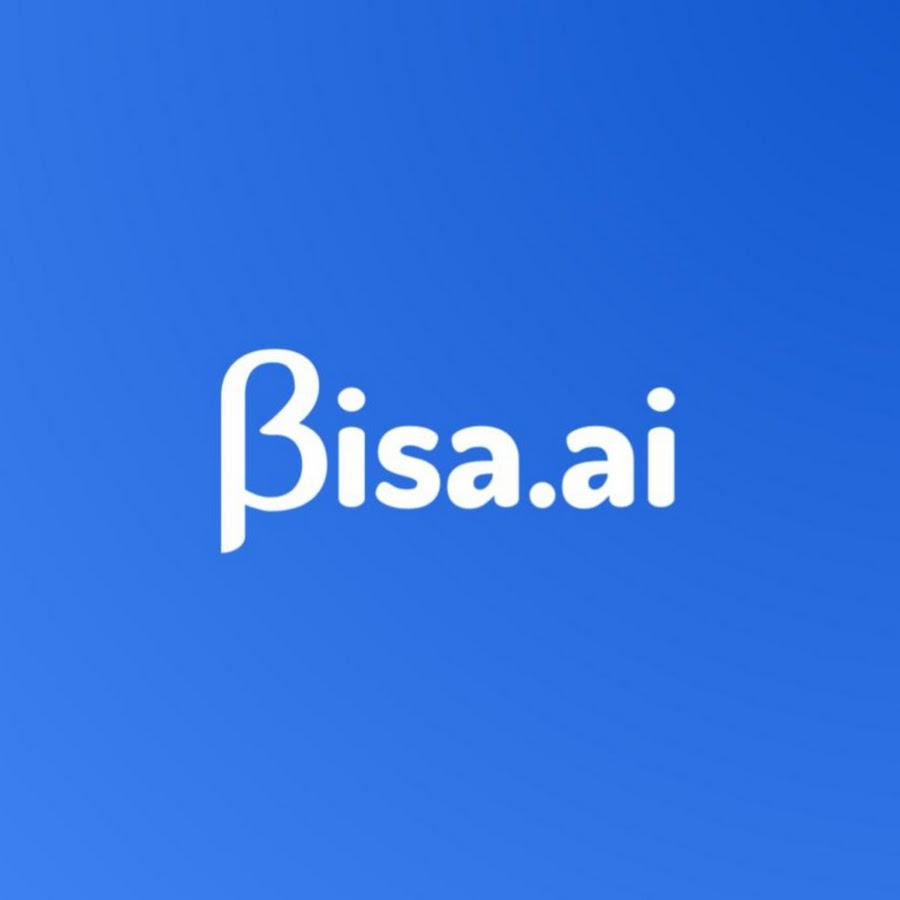
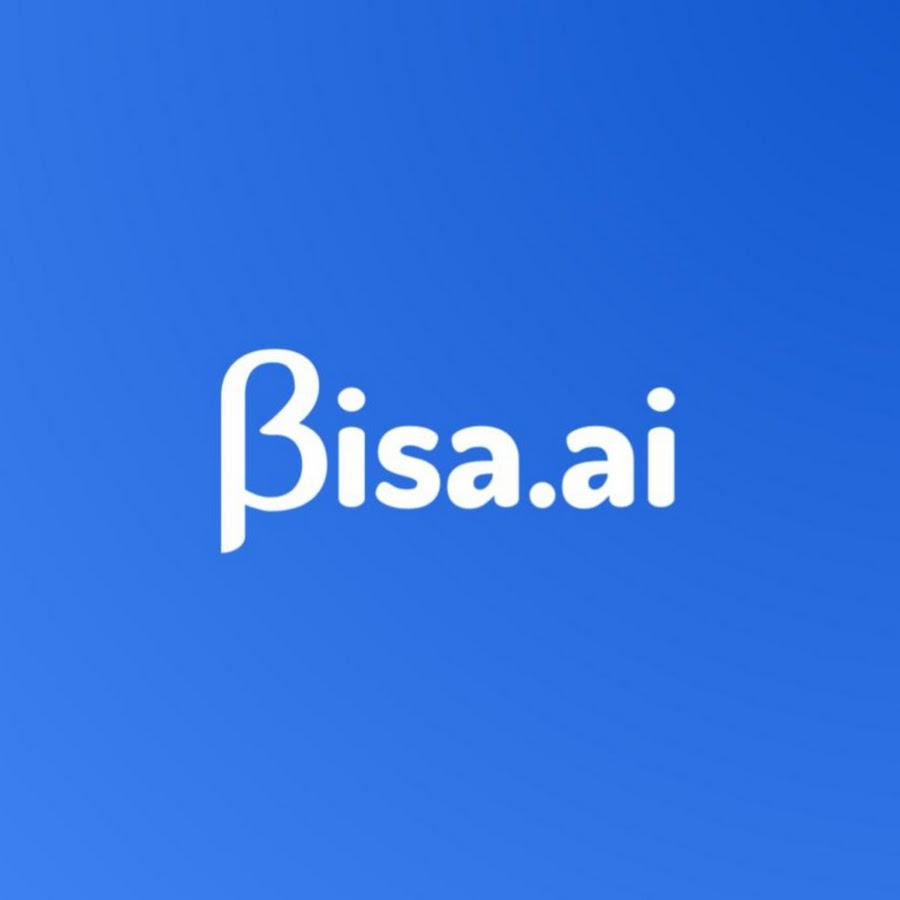

In [ ]:
bc.__dict__

In [ ]:
bc.__dict__

{'chain': [{'hash': '794f341c057fe180e36b1f54f9523301f4e24e65e440c441602abc5111772f01',
   'index': 0,
   'nonce': 'c8fc3dd96539558e',
   'prev_hash': None,
   'timestamp': '2022-05-03T16:43:51.353247'},
  {'hash': '000006d8615cd3790930078ba0a6d66ad0dd1befb74896b86472931993fde8fb',
   'index': 1,
   'nonce': 'b576c7f25269bba5',
   'prev_hash': '794f341c057fe180e36b1f54f9523301f4e24e65e440c441602abc5111772f01',
   'timestamp': '2022-05-03T16:43:54.683146'}]}